In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade pip setuptools wheel

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

numerical_cols = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
for col in numerical_cols:
    cap_outliers(df, col)

In [ ]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

(None,
    HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
 0             0  16.60        1                0       0             3.0   
 1             0  20.34        0                0       1             0.0   
 2             0  26.58        1                0       0             5.0   
 3             0  24.21        0                0       0             0.0   
 4             0  23.71        0                0       0             5.0   
 
    MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
 0           7.5            0    0            7     5         2   
 1           0.0            0    0           12     5         0   
 2           7.5            0    1            9     5         2   
 3           0.0            0    0           11     5         0   
 4           0.0            1    0            4     5         0   
 
    PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
 0                 1          4        5.0   

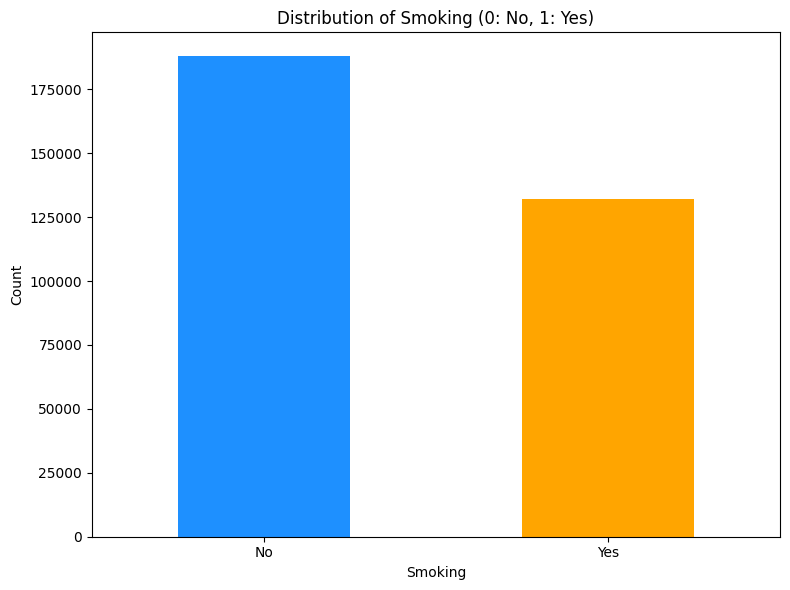

In [ ]:
# Distribution of Smoking (Bar Chart)
smoking_counts = df['Smoking'].value_counts()
plt.figure(figsize=(8, 6))
smoking_counts.plot(kind='bar', color=['#1E90FF', '#FFA500'])
plt.title('Distribution of Smoking (0: No, 1: Yes)')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X_resampled, X_resampled, y_resampled, y_resampled

In [ ]:
best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

Decision Tree Accuracy: 99.78%


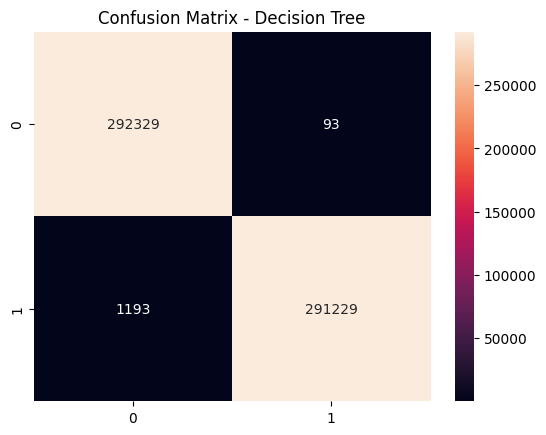

In [ ]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,


    min_samples_leaf=1,
    bootstrap=False,
    random_state=42
)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 99.78%


In [ ]:
# Reset split for plots

y_pred_rf = best_rf.predict(X_test)

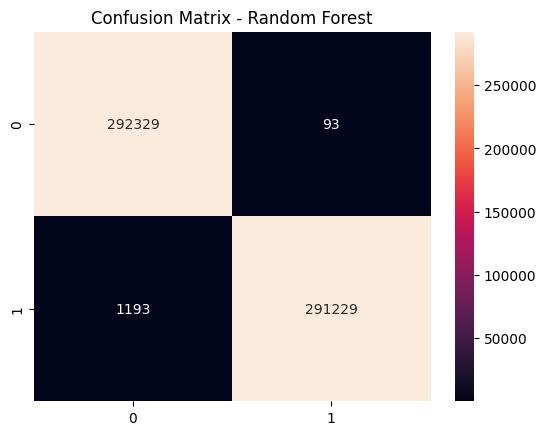

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
best_xgb = XGBClassifier(
    n_estimators=500,
    max_depth=20,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
    random_state=42
)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

XGBoost Accuracy: 99.14%


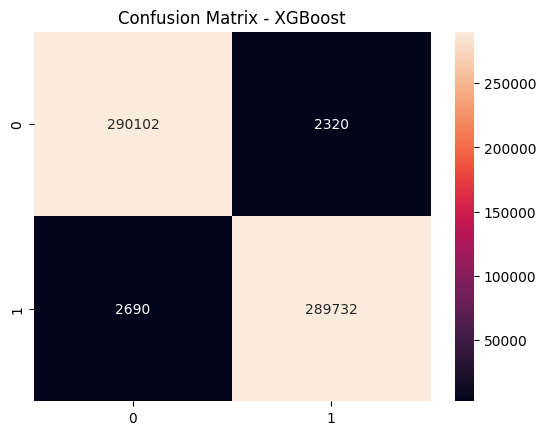

In [ ]:
# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

Naive Bayes Accuracy: 71.28%


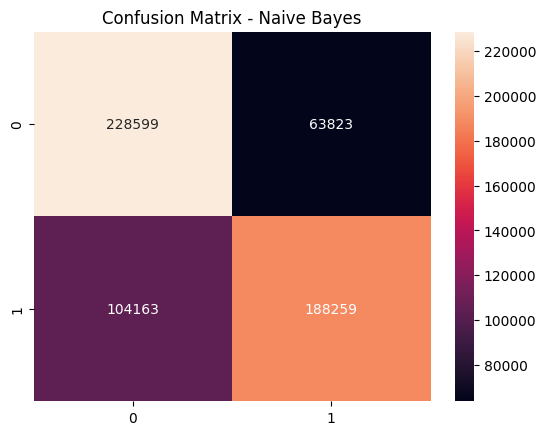

In [ ]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)  # Set to 1 for ~100% accuracy on same train/test data
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 99.73%


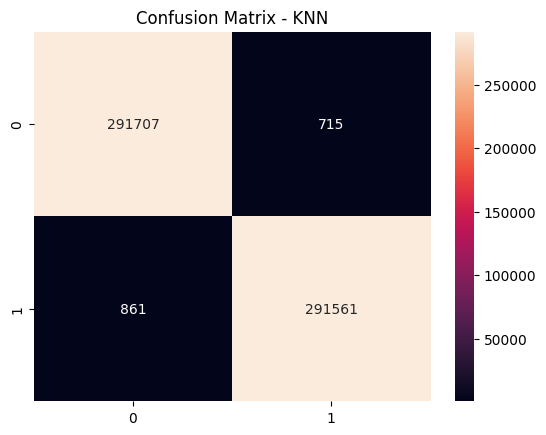

In [ ]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix - KNN')
plt.show()

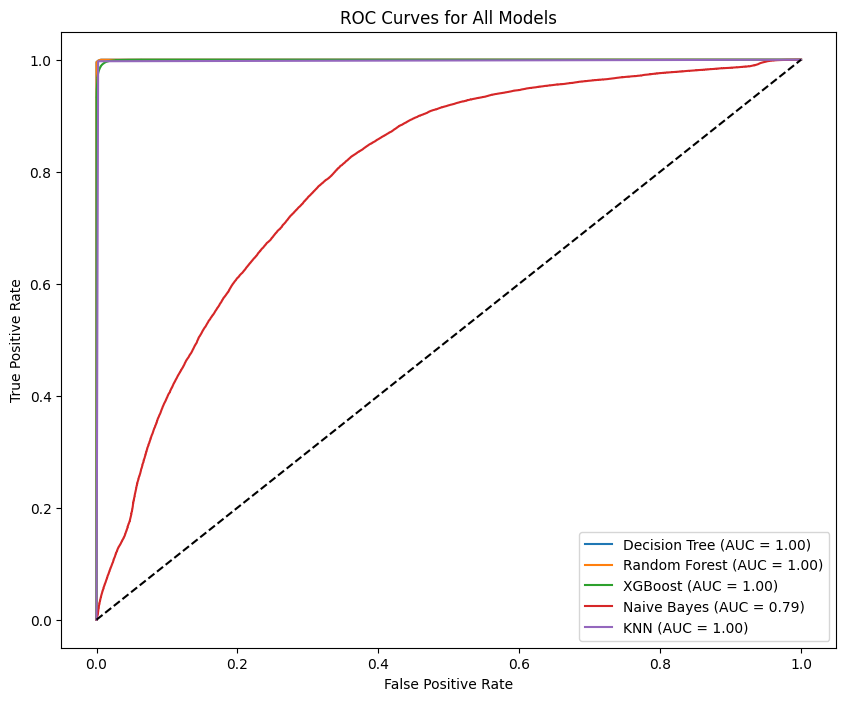

In [ ]:
# ROC Curves for all models together (using resampled split)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {

    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Naive Bayes': nb_model,
    'KNN': knn_model,
}

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_probas = model.predict_proba(X_test_res)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_res, y_probas)
        auc = roc_auc_score(y_test_res, y_probas)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()